In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

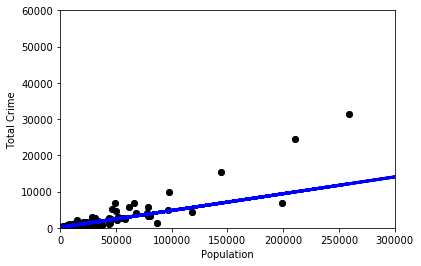

Coefficients: 
 [ 0.0464106]
Intercept: 
 131.237502


In [4]:
df = pd.read_excel('/Users/cappsjr/Downloads/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
df.columns = ('City', 'Population', 'Violent Crime', 'Murder and nonnegligent manslaughter',
                     'Rape (revised definition)', 'Rape (Legacy definition)', 'Robbery', 'Aggravated assault',
                     'Property crime', 'Burglary', 'Larceny-theft', 'Motor vehicle theft', 'Arson3')

df1 = df.drop([0, 1, 2, 3, 352, 353, 354]).fillna(0)

# make a row that totals all the crimes commited in each location
df1['Total Crime'] = df1['Violent Crime'] + df1['Murder and nonnegligent manslaughter'] + df1['Rape (revised definition)'] + df1['Rape (Legacy definition)'] + df1['Robbery'] + df1['Aggravated assault'] + df1['Property crime'] + df1['Burglary'] + df1['Larceny-theft'] + df1['Motor vehicle theft'] + df1['Arson3']

# make variables x (independent variable) and  y (dependent variable)
x = df1['Population'].values.reshape(-1, 1)
y = df1['Total Crime']

#Instantiate our model
regr = linear_model.LinearRegression()

#Fit our model to our data
regr.fit(x, y)


plt.scatter(x, y)
plt.xlim(0, 0.03*1e7)
plt.ylim(0, 60000)
plt.xlabel('Population')
plt.ylabel('Total Crime')

#Plot outputs

plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

#Display the attributes we calculated
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

In [5]:
# make the feature population^2; and make murder and robbery categorical variables 

df1['Population2'] = df1['Population']**2
df1['Murder'] = np.where(df1['Murder and nonnegligent manslaughter'] > 0, 1, 0)
df1['Robbery1'] = np.where(df1['Robbery'] > 0, 1, 0)

In [6]:
df1.head()

,City,Population,Violent Crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (Legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3,Total Crime,Population2,Murder,Robbery1
4,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,24,3463321,0,0
5,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,54,6640929,0,0
6,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,38,8099716,0,0
7,Albany,97956,791,8,0,30,227,526,4090,705,3243,142,0,9762,9595377936,1,1
8,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0,492,40806544,0,1


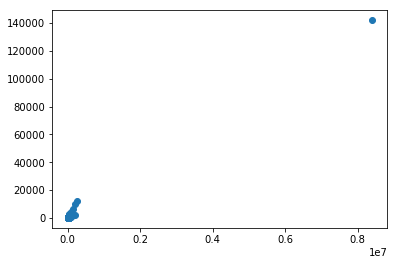

In [7]:
# graph the features and check for anamalous cases

x_pop = df1['Population']
x_pop2 = df1['Population2']
x_mur = df1['Murder']
x_rob = df1['Robbery1']
Y0 = df1['Property crime']

plt.scatter(x_pop, Y0)

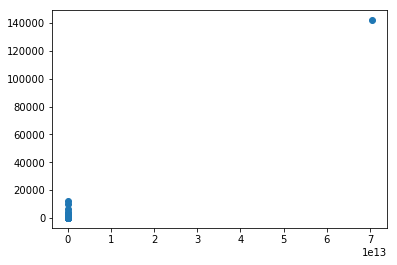

In [8]:
plt.scatter(x_pop2, Y0)

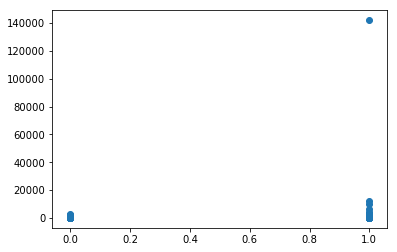

In [9]:
plt.scatter(x_mur, Y0)

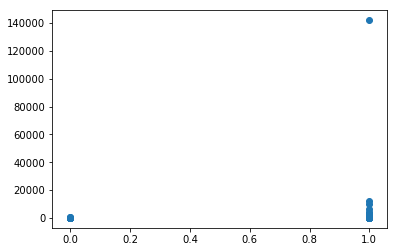

In [10]:
plt.scatter(x_rob, Y0)

In [11]:
# locate the outlier in the data and remove it

col = df1['Population']

col[np.abs(col) > 0.6 * 1e7]

220    8396126
Name: Population, dtype: int64

In [12]:
df2 = df1.drop(220)

In [13]:
df2['Total Crime'] = df1['Violent Crime'] + df1['Murder and nonnegligent manslaughter'] + df1['Rape (revised definition)'] + df1['Rape (Legacy definition)'] + df1['Robbery'] + df1['Aggravated assault'] + df1['Property crime'] + df1['Burglary'] + df1['Larceny-theft'] + df1['Motor vehicle theft'] + df1['Arson3']
df2['Population2'] = df2['Population']**2
df2['Murder'] = np.where(df2['Murder and nonnegligent manslaughter'] > 0, 1, 0)
df2['Robbery1'] = np.where(df2['Robbery'] > 0, 1, 0)

In [14]:
X_pop = df2['Population']
X_pop2 = df2['Population2']
X_mur = df2['Murder']
X_rob = df2['Robbery1']
Y1 = df2['Property crime']

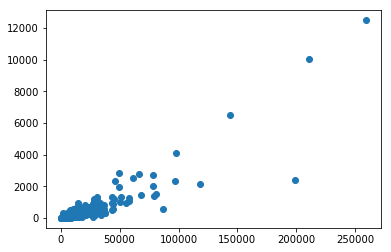

In [15]:
plt.scatter(X_pop, Y1)

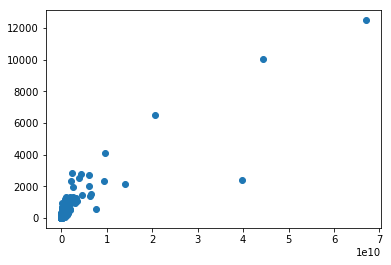

In [16]:
plt.scatter(X_pop2, Y1)

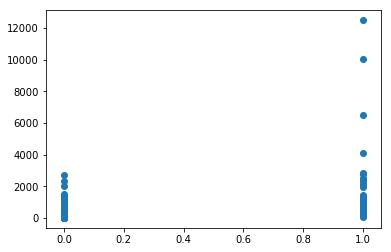

In [17]:
plt.scatter(X_mur, Y1)

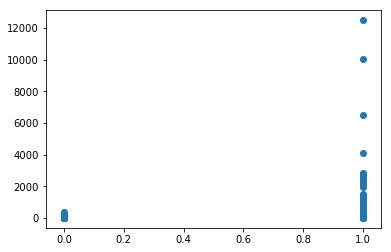

In [18]:
plt.scatter(X_rob, Y1)

In [19]:
X = df2[['Population', 'Population2', 'Murder', 'Robbery1']]
Y = df2['Property crime']

#Instantiate our model
regr = linear_model.LinearRegression()

#Fit our model to our data
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercepts: \n', regr.intercept_)


Coefficients: 
 [  1.29510871e-02   1.14920528e-07   1.95038666e+02   9.28205845e+01]

Intercepts: 
 -16.8158663217


In [21]:
# The code below creates the three dimensional hyperplane plot in the first section.

from mpl_toolkits.mplot3d import Axes3D

# fit a OLS model with intercepts on population, population**2, murder, and robbery
X = sm.add_constant(X)
est = sm.OLS(Y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Property crime   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     464.3
Date:                Mon, 31 Jul 2017   Prob (F-statistic):          8.94e-137
Time:                        11:39:30   Log-Likelihood:                -2577.7
No. Observations:                 347   AIC:                             5165.
Df Residuals:                     342   BIC:                             5185.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.8159     36.019     -0.467      0.641     -87.663      54.031
Population      0.0130      0.002      5.975      0.000       0.009       0.017
Population2  1.149e-07   1.04e-08     11.053      0.000    9.45e-08    1.35e-07
Murder        195.0387     76.642      2.545      0.011      44.290     345.788
Robbery1       92.8206     51.440      1.804      0.072      -8.358     193.999
==============================================================================
Omnibus:                      394.297   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73973.584
Skew:                          -4.487   Prob(JB):                         0.00
Kurtosis:                      73.963   Cond. No.                     1.80e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Conduct a PCA of the data

# standardize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [23]:
# Next we obtain the covariance matrix

print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 0.          0.          0.          0.          0.        ]
 [ 0.          1.00289017  0.89115011  0.50416543  0.34534177]
 [ 0.          0.89115011  1.00289017  0.34586957  0.15272868]
 [ 0.          0.50416543  0.34586957  1.00289017  0.31140001]
 [ 0.          0.34534177  0.15272868  0.31140001  1.00289017]]


In [24]:
# Perform an eigendecomposition on the covariance matrix

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.          0.          0.          0.          1.        ]
 [-0.61810418  0.21861606  0.15012998 -0.74001029  0.        ]
 [-0.55864869  0.46387353  0.22571514  0.64945028  0.        ]
 [-0.44806599 -0.29719977 -0.8349894   0.11705497  0.        ]
 [-0.32418473 -0.80541956  0.47885944  0.12998933  0.        ]]

Eigenvalues 
[ 2.35491752  0.93609761  0.6401608   0.08038476  0.        ]


In [25]:
# Selecting which eigenvectors to keep

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.35491752136
0.936097612394
0.64016080451
0.0803847553761
0.0


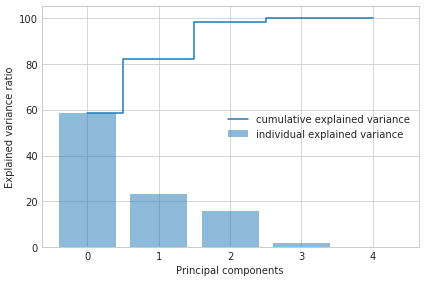

In [29]:
# Explained variance

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(5), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [31]:
# Make the projection matrix

matrix_w = np.hstack((eig_pairs[0][1].reshape(5,1),
                      eig_pairs[1][1].reshape(5,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.          0.        ]
 [-0.61810418  0.21861606]
 [-0.55864869  0.46387353]
 [-0.44806599 -0.29719977]
 [-0.32418473 -0.80541956]]


In [32]:
Y = X_std.dot(matrix_w)